# 신경망 적용해보기
## 보스턴 주택 가격 예측
 - 데이터 설명
  - 13개의 특성, 레이블은 주택 가격의 중간가격(＄1000단위)
  - 특성마다 값을 나타내는 방법이 다르므로 표준화(Standardization)를 수행함
    - ex) 범죄율 0 ~ 1, 방 개수 3 ~ 9등
  - 표준화는 데이터의 평균을 빼고, 표준편차로 나눠줍니다 -> Z-Normalization 표준정규분포 참고
    - 다른 머신러닝 전처리 방법에도 사용됨!

### 보스턴 주택가격 데이터셋 다운로드

In [1]:
from tensorflow.keras.datasets.boston_housing import load_data

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

65536/57026 [==================================] - 0s 0us/step


### 데이터 형태 확인하기

In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


### 데이터 전처리 및 검증 데이터셋 만들기

In [6]:
import numpy as np

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# 훈련 데이터셋과 검증 데이터셋으로 나눕니다.
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.33, 
                                                  random_state = 777)

### 모델 구성하기
 - 모델의 마지막 Dense층에서 별도의 활성화 함수를 사용하지 않음
  - 인자를 설정하지 않은 경우, default는 'linear'로 설정
 - 손실 함수는 회귀문제에서 주로 사용되는 평균 제곱 오차(MSE:Mean Squared Error)를 사용

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 13차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(10, activation = 'relu', input_shape = (13, )))     # x값 숫자 안맞으면 error # 첫번째 층은 activation 생략하기도 함.
model.add(Dense(5, activation = 'relu')) # 32개의 출력을 가지는 Dense 층   # 이층은 사용자 마음
# model.add(dropout(0.25))  # w25% 없애겠다
# model.add 를 몇개를 더 하든 상관없음 단, activation은 relu를 함.
model.add(Dense(1)) # 하나의 값을 출력합니다.       -> 최종 출력층, 선형회귀는 1개, 활성화함수는 생략가능

#model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae','acc'], )  # 'acc'는 성공률
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['acc'], )

In [8]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 3ms/step - loss: 639.2335 - mae: 23.5039


[639.2335205078125, 23.50394058227539]

In [7]:
model.summary()
# Param 구하는 공식 ==> dense수 * input구 + dense수
# 1번층 Dense(10)는 13개의 w값과 1개의 b를 갖는 총 14개의 param이 10개 있음.-> 14*10=140개의 param이 나옴(최종 dense만큼 node가 나옴)
    # => 10*13+10
# 2번층 Dense(5)는 1번층 dense의 10개의 노드가 input값이 됨, 10개의 w와 1개의 b가 있음, 한세트는 11개임 * 5 = 55개의 param
    # => 5*10+5
# 3번층 Dense(1)은 2번층의 dense 5개가 input임 (5개의 w, 1개의 b=>총 6개)
    # => 1*5+1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델의 가중치값 표시
[
layer1 => dense w 13개[dense1번 w 13개], [dense2번 w 13개].......[dense10번 w13개]
layer2 => dense 5 w 10개[dense 1번 w1개].....[dense 5번 w1개]
layer3 => dense 1 w 5개[dense1번 w 5개]
]

In [13]:
model.get_weights()

[array([[-0.4487946 ,  0.17028183,  0.17046362, -0.13386115,  0.39447802,
         -0.19464755,  0.08181775,  0.28031588, -0.45281252, -0.03022009],
        [-0.28008145,  0.13809937,  0.05273902, -0.23516554,  0.31342775,
          0.02867663, -0.179432  , -0.3332322 ,  0.486453  , -0.1683667 ],
        [-0.22403705, -0.19973257,  0.24138242, -0.3476225 ,  0.12496883,
         -0.29258877, -0.07052398, -0.03958458,  0.34765673, -0.33205476],
        [ 0.2334137 , -0.04020599, -0.00202048, -0.41706404,  0.2981034 ,
         -0.35560316, -0.48512748,  0.25643617, -0.2878131 ,  0.3828718 ],
        [ 0.2539354 , -0.02162194, -0.12869775,  0.1474433 , -0.16333285,
          0.39730072, -0.1597107 ,  0.25363207,  0.27866656, -0.4489349 ],
        [ 0.19163805,  0.27771395,  0.488221  , -0.09125918, -0.36772776,
         -0.47068092,  0.32751065,  0.15960634,  0.37759805,  0.284047  ],
        [ 0.10921389, -0.0603072 , -0.31067628,  0.44496584,  0.3455354 ,
          0.26553237, -0.3703268

### 학습하고 평가하기

In [25]:
# 오버피팅(가중치가 훈련데이터만 잘 맞는경우)를 확인하는 방법
# 오버피팅이 있으면 dense수를 줄이거나, 모델의 add를 줄이거나, epochs를 줄이거나, 모델 add사이에 dropout을 넣거나, 배치를 크게하거나, 러닝레이트값을 크게하거나
# 오버피팅의 대한 정답은 없음
# w,b 갱신은 훈련데이터하고만 작업함 / 검증이나 테스트데이터는 w,b를 넣어서 계산만 함.

# 훈련데이터의 loss값은 줄어드는데 검증데이터의 loss값은 늘어나는 경우
history = model.fit(x_train, y_train, 
                    epochs = 500, # 수치에 따라 그래프 값이 많이 변함
                    validation_data = (x_val, y_val)) # 검증데이터는 훈련데이터의 몇%로 하기도 하고, 지금처럼 별도의 데이터를 넣어서 하기도함.
                    # 보통 테스트 데이터 많이 넣음

Epoch 1/500
9/9 [==============================] - 0s 10ms/step - loss: 10.6595 - acc: 0.0000e+00 - val_loss: 18.4359 - val_acc: 0.0000e+00
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 10.6430 - acc: 0.0000e+00 - val_loss: 18.4702 - val_acc: 0.0000e+00
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 10.6487 - acc: 0.0000e+00 - val_loss: 18.3941 - val_acc: 0.0000e+00
Epoch 4/500
9/9 [==============================] - 0s 7ms/step - loss: 10.6404 - acc: 0.0000e+00 - val_loss: 18.4974 - val_acc: 0.0000e+00
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 10.6095 - acc: 0.0000e+00 - val_loss: 18.4012 - val_acc: 0.0000e+00
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 10.6174 - acc: 0.0000e+00 - val_loss: 18.3026 - val_acc: 0.0000e+00
Epoch 7/500
9/9 [==============================] - 0s 5ms/step - loss: 10.6244 - acc: 0.0000e+00 - val_loss: 18.5045 - val_acc: 0.0000e+00
Epoch 8/500
9/9 [=========

<Figure size 864x288 with 0 Axes>

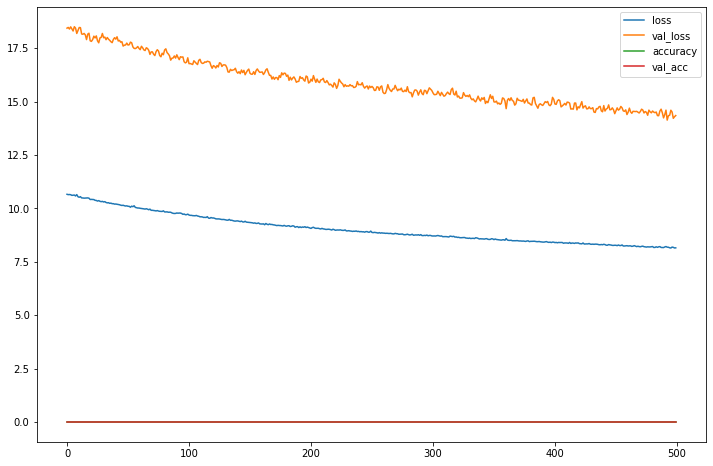

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

In [27]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 9.9868 - acc: 0.0000e+00


[9.986797332763672, 0.0]

In [28]:
# 텐서에 들어가는 데이터는  차원+1
# 주택가격 예측시 아래와 같이 사용함.

new_x=[[1,2,3,4,5,6,7,8,9,10,11,12,13]]     # 대괄호를 1개만할시 밸류 error 발생

model.predict(new_x)

array([[51.425083]], dtype=float32)

## K-Fold 사용하기
 - K-Fold CrossValidation
  - 모델은 많은 데이터를 보여줄수록 성능이 올라감
  - K-Fold 방법을 사용해서 최대한 많은 데이터를 볼 수 있도록 도와줌
  - K는 주로 3 ~ 10을 사용

 - 데이터 개수가 적은 경우, 성능을 향상시킬 수 있는 좋은 방법: 교차검증

In [1]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)
# 여기까진 전부 동일합니다.
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

65536/57026 [==================================] - 0s 0us/step


### K-Fold 정의

In [2]:
from sklearn.model_selection import KFold
#----------------------------------------
# K-Fold를 진행해봅니다.
k = 3

# 주어진 데이터셋을 k만큼 등분합니다.
# 여기서는 3이므로 훈련 데이터셋(404개)를 3등분하여
# 1개는 검증셋으로, 나머지 2개는 훈련셋으로 활용합니다.
kfold = KFold(n_splits=k, random_state = 777)

# 재사용을 위해 모델을 반환하는 함수를 정의합니다.
def get_model():
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = (13, )))
    model.add(Dense(32, activation = 'relu')) 
    model.add(Dense(1))   

    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
    
    return model

mae_list = [] # 테스트셋을 평가한 후 결과 mae를 담을 리스트를 선언합니다.

# k번 진행합니다.
for train_index, val_index in kfold.split(x_train):
    # 해당 인덱스는 무작위로 생성됩니다.
    # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법입니다.
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # 모델을 불러옵니다.
    model = get_model()
    
    model.fit(x_train_fold, y_train_fold, epochs = 300, validation_data = (x_val_fold, y_val_fold))
    
    test_mse, test_mae = model.evaluate(x_test, y_test)
    mae_list.append(test_mae)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Epoch 1/300
9/9 [==============================] - 1s 24ms/step - loss: 576.1182 - mae: 22.1453 - val_loss: 548.8381 - val_mae: 21.5897
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 546.6316 - mae: 21.4929 - val_loss: 521.0392 - val_mae: 20.9475
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 515.5146 - mae: 20.7779 - val_loss: 489.1298 - val_mae: 20.1837
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 479.3068 - mae: 19.9146 - val_loss: 450.0294 - val_mae: 19.2241
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 432.9510 - mae: 18.7870 - val_loss: 402.0672 - val_mae: 17.9930
Epoch 6/300
9/9 [==============================] - 0s 7ms/step - loss: 377.4453 - mae: 17.3677 - val_loss: 346.3574 - val_mae: 16.4724
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 314.9445 - mae: 15.6173 - val_loss: 285.5767 - val_mae: 14.6388
Epoch 8/300
9/9 [==============================] - 0s 

### K-Fold 결과 확인하기

In [3]:
print(f'전체 결과: {mae_list}')
print(f'평균낸 결과를 최종 결과로 사용합니다: {np.mean(mae_list)}')

전체 결과: [2.0720932483673096, 2.035085439682007, 2.23749041557312]
평균낸 결과를 최종 결과로 사용합니다: 2.114889701207479
